In [1]:
import tensorflow as tf
import os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
base_dir = 'data'
folder_latih = os.path.join(base_dir, 'train')
folder_validasi = os.path.join(base_dir, 'test')

In [5]:
# cek folder
os.listdir(folder_latih)

['use_mask', 'no_mask']

In [7]:
# membuat objek imageDataGenerator untuk mempersiapkan data

latih_datagenerator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=90, # 20  #untuk merotasi image secara acak
    width_shift_range=0.2, # untuk menggeser panjang gambar
    height_shift_range=0.2, # untuk menggeser lebar gambar
    shear_range=0.2,
    validation_split=0.2,
    zoom_range=0.2, # untuk zoom gambar
    horizontal_flip=True, # untuk memutar gambar secara horizontal
    fill_mode = 'nearest'
)

test_dataGenerator = ImageDataGenerator(
    rescale = 1./255, 
    rotation_range=90, # 20  #untuk merotasi image secara acak
    width_shift_range=0.2, # untuk menggeser panjang gambar
    height_shift_range=0.2, # untuk menggeser lebar gambar
    shear_range=0.2,
    validation_split=0.2,
    zoom_range=0.2, # untuk zoom gambar
    horizontal_flip=True, # untuk memutar gambar secara horizontal
    fill_mode = 'nearest'
)

In [8]:
# mempersiapkan data dari ImageDataGenerator

latih_generator = latih_datagenerator.flow_from_directory(
    folder_latih,
    target_size=(150,150),
    batch_size = 4,
    color_mode="rgb",
    class_mode = "binary"
)

validasi_generator = test_dataGenerator.flow_from_directory(
    folder_validasi,
    target_size=(150,150),
    batch_size = 4,
    color_mode = 'rgb',
    class_mode = 'binary'
)

Found 143 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [9]:
# membuat arsitektur CNN (Convolutional Neural Network)
"""penggunaan teknik dropout diakhir pooling bertujuan untuk mencegah overvit 
    pada pelatihan model"""
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),  
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    latih_generator,
    steps_per_epoch = 10,
    epochs= 200,
    validation_data = validasi_generator,
    validation_steps = 10,
    verbose=2
)

 val_accuracy: 0.5000
Epoch 4/200
10/10 - 10s - loss: 0.6832 - accuracy: 0.5385 - val_loss: 0.6901 - val_accuracy: 0.4474
Epoch 5/200
10/10 - 10s - loss: 0.6796 - accuracy: 0.5750 - val_loss: 0.6042 - val_accuracy: 0.6316
Epoch 6/200
10/10 - 10s - loss: 0.6783 - accuracy: 0.6250 - val_loss: 0.5792 - val_accuracy: 0.6500
Epoch 7/200
10/10 - 10s - loss: 0.4975 - accuracy: 0.8250 - val_loss: 0.5469 - val_accuracy: 0.6579
Epoch 8/200
10/10 - 10s - loss: 0.5288 - accuracy: 0.7692 - val_loss: 0.3083 - val_accuracy: 0.8750
Epoch 9/200
10/10 - 10s - loss: 0.4042 - accuracy: 0.8500 - val_loss: 0.7539 - val_accuracy: 0.6316
Epoch 10/200
10/10 - 9s - loss: 0.4484 - accuracy: 0.7750 - val_loss: 0.2466 - val_accuracy: 0.9474
Epoch 11/200
10/10 - 9s - loss: 0.1864 - accuracy: 0.9487 - val_loss: 0.2616 - val_accuracy: 0.9000
Epoch 12/200
10/10 - 15s - loss: 0.3467 - accuracy: 0.8500 - val_loss: 0.5041 - val_accuracy: 0.8684
Epoch 13/200
10/10 - 12s - loss: 0.1630 - accuracy: 0.9250 - val_loss: 0.4542

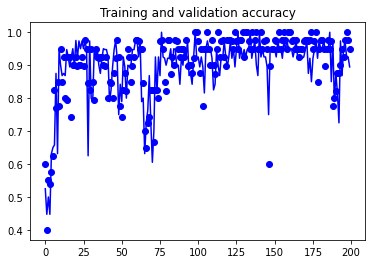

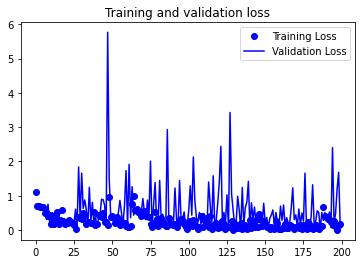

In [13]:
""" membuat grafik tingkat akurasi data training dan validasi 
    dan grafik tingkat kesalahan data training dan validasi"""

    # menggunakan bahasa inggris agar sesuai dengan sebelumnya
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
model.save('face_mask_classifier2.h5')

[[1.]]
masker


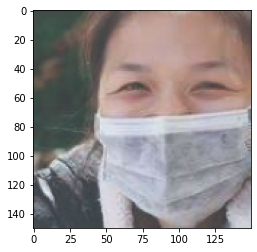

In [29]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import random
%matplotlib inline

test_image_path = glob.glob('data/test/**/*.jp*')
train_image_path = glob.glob('data/train/**/*.jp*')

images = test_image_path + train_image_path
img_path = random.choice(images)

 
# for fn in uploaded.keys():
 
#   # predicting images
#   path = fn
img = image.load_img(img_path, target_size=(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes)
if classes==0:
  print('tanpa masker')
else:
  print('masker')